In [59]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from pathlib import Path
from utils import add_time


def plot_predictions(df_path, save_path=''):

    # load data
    df_pred = add_time(pd.read_parquet(df_path))

    # select all units (true values)
    unts = [ c for c in df_pred.columns if c.startswith('unt_') ]

    # cutoff for time in ms
    max_t = 10e3

    # create plot
    n = len(unts)
    fig, axmat, = plt.subplots(ncols=2, nrows=n, figsize=(10, n*2))

    # cycle through units
    for axarr, unt in zip(axmat, unts):

        # right-hand axis: predicted firing rates
        ax = axarr[1]
        ax.set_title(f'{unt}: pred')

        df = pd.pivot_table(data=df_pred, index='trial', columns='t', values=f'predict_{unt}')
        df = df.loc[ :, df.columns < max_t ]
        ax.pcolormesh(df.columns.values, range(len(df)), df.values)
        
        # pass plotted trials indices to left plot
        trl_idx = df.index

        # left-hand plot: recorded firing rates
        ax = axarr[0]
        ax.set_title(f'{unt}: true')

        df = pd.pivot_table(data=df_pred, index='trial', columns='t', values=unt)
        df = df.loc[ trl_idx, df.columns < max_t ]

        ax.pcolormesh(df.columns.values, range(len(df)), df.values)

        # formatting
        for ax in axarr:
            ax.set_ylabel('trial') 
            ax.set_yticklabels([])

    for ax in axarr:
        ax.set_xlabel('time [s]')

    fig.tight_layout()
    if save_path:
        fig.savefig(save_path)
        plt.close(fig)

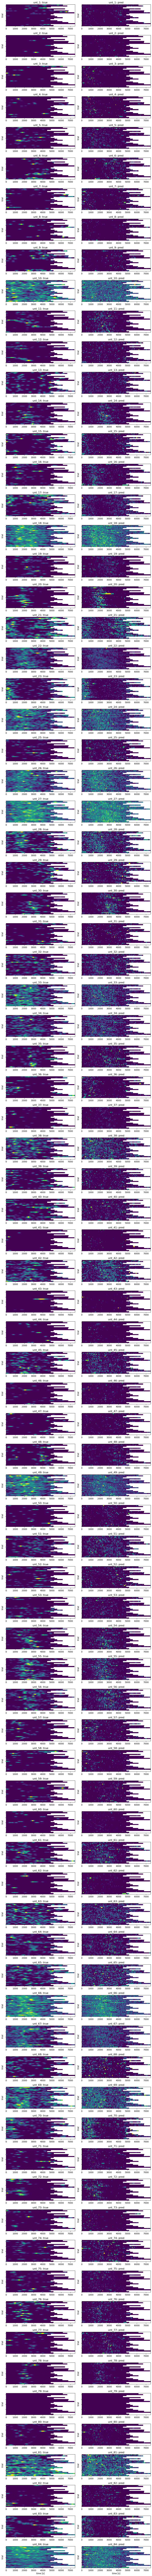

In [57]:
plot_predictions('./data/predictions/df_prc_100_test_predict.parquet')

In [64]:
for p in Path('./data/predictions/').glob('df_prc_*_test_predict.parquet'):
    plot_predictions(p, p.with_suffix('.png'))